In [1]:
import pandas as pd

# Load the provided dataset
file_path = 'transport_ireland.csv'
ireland_transport_data = pd.read_csv(file_path)

# Display the first few 
ireland_transport_data.head()


,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,40709.0


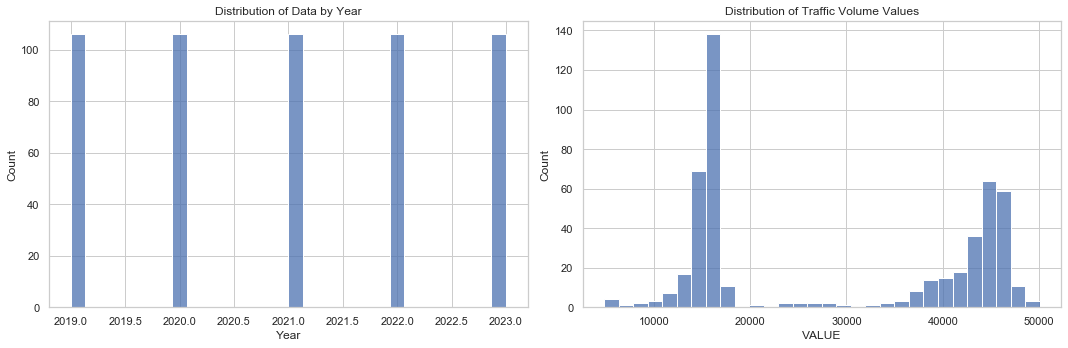

,TLIST(W1),Year,C03910V04662,C01198V01436,VALUE
count,530.00000,530.00000,530.000000,530.00000,496.000000
mean,2021.00000,2021.00000,15.000000,27.00000,28891.663306
std,1.41555,1.41555,5.004724,15.31151,14377.595591
min,2019.00000,2019.00000,10.000000,1.00000,4882.000000
25%,2020.00000,2020.00000,10.000000,14.00000,15726.500000
50%,2021.00000,2021.00000,15.000000,27.00000,17129.000000
75%,2022.00000,2022.00000,20.000000,40.00000,44526.250000
max,2023.00000,2023.00000,20.000000,53.00000,50049.000000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization style
sns.set(style="whitegrid")

# Descriptive statistics of the dataset
descriptive_stats = ireland_transport_data.describe()

# Plotting distributions of numeric data
plt.figure(figsize=(15, 5))

# Histogram for the 'Year'
plt.subplot(1, 2, 1)
sns.histplot(ireland_transport_data['Year'], kde=False, bins=30)
plt.title('Distribution of Data by Year')

# Histogram for the 'VALUE'
plt.subplot(1, 2, 2)
sns.histplot(ireland_transport_data['VALUE'], kde=False, bins=30)
plt.title('Distribution of Traffic Volume Values')

plt.tight_layout()
plt.show()

descriptive_stats


In [5]:
# Check for missing values in the Irish dataset
ireland_missing_values = ireland_transport_data.isnull().sum()

# Check the data types and unique values for each column
ireland_data_types = ireland_transport_data.dtypes
ireland_unique_values = ireland_transport_data.nunique()

# Output the findings
print("Missing Values in Irish Dataset:\n", ireland_missing_values)
print("\nData Types in Irish Dataset:\n", ireland_data_types)
print("\nUnique Values in Irish Dataset:\n", ireland_unique_values)


Missing Values in Irish Dataset:
 STATISTIC                  0
Statistic Label            0
TLIST(W1)                  0
Year                       0
C03910V04662               0
Transport Traffic Site     0
C01198V01436               0
Weeks of the year          0
UNIT                       0
VALUE                     34
dtype: int64

Data Types in Irish Dataset:
 STATISTIC                  object
Statistic Label            object
TLIST(W1)                   int64
Year                        int64
C03910V04662                int64
Transport Traffic Site     object
C01198V01436                int64
Weeks of the year          object
UNIT                       object
VALUE                     float64
dtype: object

Unique Values in Irish Dataset:
 STATISTIC                   1
Statistic Label             1
TLIST(W1)                   5
Year                        5
C03910V04662                2
Transport Traffic Site      2
C01198V01436               53
Weeks of the year          53
UNIT

In [7]:
# Impute missing values in the 'VALUE' column with the median
median_value = ireland_transport_data['VALUE'].median()
ireland_transport_data['VALUE'].fillna(median_value, inplace=True)

# Check if there are any missing values left
missing_values_after_imputation = ireland_transport_data['VALUE'].isnull().sum()
print("Missing values after imputation in 'VALUE' column:", missing_values_after_imputation)


Missing values after imputation in 'VALUE' column: 0


In [10]:
# Load the Addis Ababa City Road Traffic Accident Dataset
addis_ababa_traffic_data_path = 'cleaned.csv'
addis_ababa_traffic_data = pd.read_csv(addis_ababa_traffic_data_path)

# Display the first few rows of the dataset
addis_ababa_traffic_data.head()


,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
0,18-30,Male,Above high school,Employee,1-2yr,Unknown,No junction,Asphalt roads,Daylight,Normal,Collision with roadside-parked vehicles,Going straight,Not a Pedestrian,Moving Backward,2
1,31-50,Male,Junior high school,Employee,Above 10yr,Undivided Two way,No junction,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2
2,18-30,Male,Junior high school,Employee,1-2yr,other,No junction,Asphalt roads,Daylight,Normal,Collision with roadside objects,Going straight,Not a Pedestrian,Changing lane to the left,1
3,18-30,Male,Junior high school,Employee,5-10yr,other,Y Shape,Earth roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Changing lane to the right,2
4,18-30,Male,Junior high school,Employee,2-5yr,other,Y Shape,Asphalt roads,Darkness - lights lit,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,Overtaking,2


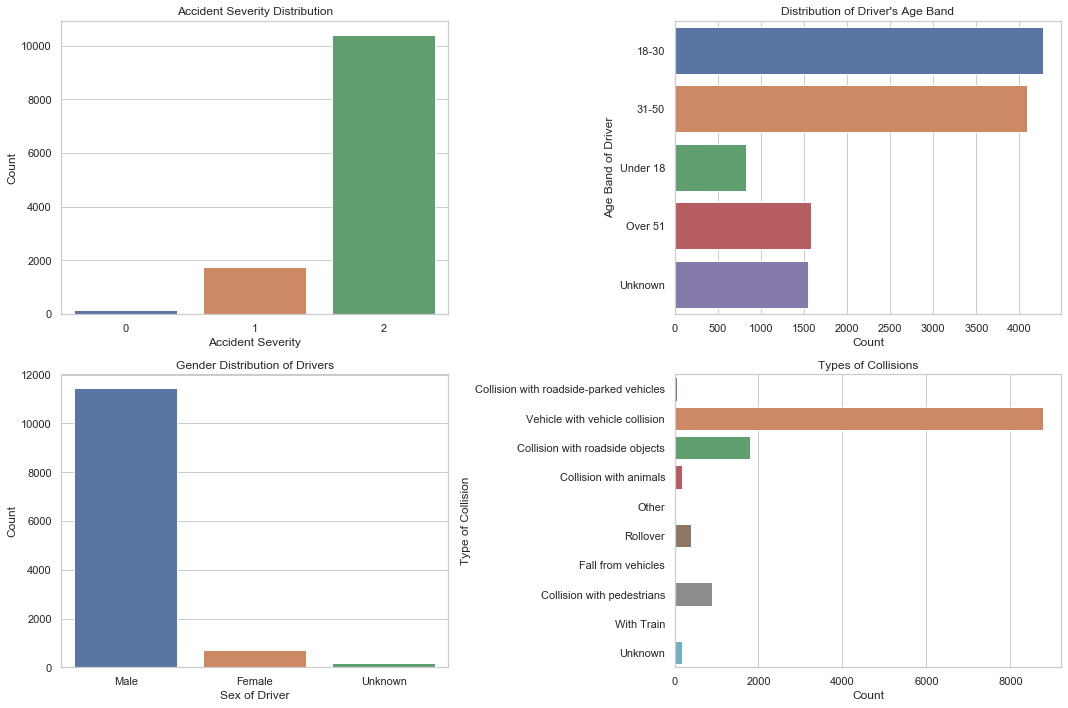

,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Lanes_or_Medians,Types_of_Junction,Road_surface_type,Light_conditions,Weather_conditions,Type_of_collision,Vehicle_movement,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316,12316.000000
unique,5,3,7,4,8,7,8,6,4,9,10,13,9,20,NaN
top,18-30,Male,Junior high school,Employee,5-10yr,Two-way (divided with broken lines road marking),Y Shape,Asphalt roads,Daylight,Normal,Vehicle with vehicle collision,Going straight,Not a Pedestrian,No distancing,NaN
freq,4271,11437,7619,9627,3363,4411,4543,11296,8798,10063,8774,8158,11390,2263,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.832819
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.406082
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.000000


In [11]:
# Descriptive statistics for the Addis Ababa traffic dataset
addis_ababa_descriptive_stats = addis_ababa_traffic_data.describe(include='all')

# Visualizations for key columns in the Addis Ababa dataset
plt.figure(figsize=(15, 10))

# Subplot 1: Accident Severity Distribution
plt.subplot(2, 2, 1)
sns.countplot(x='Accident_severity', data=addis_ababa_traffic_data)
plt.title('Accident Severity Distribution')
plt.xlabel('Accident Severity')
plt.ylabel('Count')

# Subplot 2: Distribution of Driver's Age Band
plt.subplot(2, 2, 2)
sns.countplot(y='Age_band_of_driver', data=addis_ababa_traffic_data)
plt.title("Distribution of Driver's Age Band")
plt.xlabel('Count')
plt.ylabel('Age Band of Driver')

# Subplot 3: Gender Distribution of Drivers
plt.subplot(2, 2, 3)
sns.countplot(x='Sex_of_driver', data=addis_ababa_traffic_data)
plt.title('Gender Distribution of Drivers')
plt.xlabel('Sex of Driver')
plt.ylabel('Count')

# Subplot 4: Types of Collisions
plt.subplot(2, 2, 4)
sns.countplot(y='Type_of_collision', data=addis_ababa_traffic_data)
plt.title('Types of Collisions')
plt.xlabel('Count')
plt.ylabel('Type of Collision')

plt.tight_layout()
plt.show()

addis_ababa_descriptive_stats


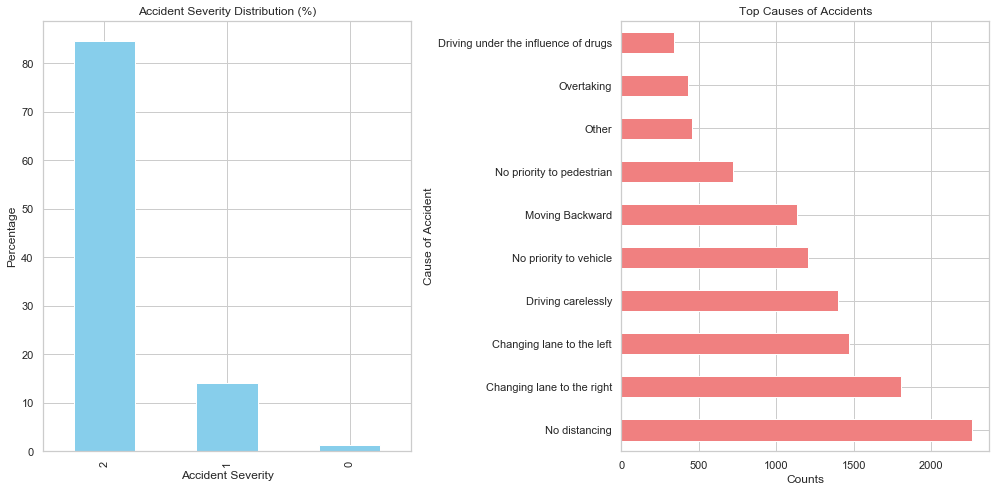

(2    84.564794
 1    14.152322
 0     1.282884
 Name: Accident_severity, dtype: float64,
 No distancing                           2263
 Changing lane to the right              1808
 Changing lane to the left               1473
 Driving carelessly                      1402
 No priority to vehicle                  1207
 Moving Backward                         1137
 No priority to pedestrian                721
 Other                                    456
 Overtaking                               430
 Driving under the influence of drugs     340
 Name: Cause_of_accident, dtype: int64,
 18-30       4271
 31-50       4087
 Over 51     1585
 Unknown     1548
 Under 18     825
 Name: Age_band_of_driver, dtype: int64,
 Male       11437
 Female       701
 Unknown      178
 Name: Sex_of_driver, dtype: int64)

In [12]:
# Analyzing accident severity and causes from the Addis Ababa dataset

# Accident Severity
accident_severity_counts = addis_ababa_traffic_data['Accident_severity'].value_counts(normalize=True) * 100

# Top Causes of Accidents
top_causes_of_accidents = addis_ababa_traffic_data['Cause_of_accident'].value_counts().head(10)

# Driver Age Band
driver_age_band_counts = addis_ababa_traffic_data['Age_band_of_driver'].value_counts()

# Sex of Driver
sex_of_driver_counts = addis_ababa_traffic_data['Sex_of_driver'].value_counts()

# Visualize the accident severity distribution
plt.figure(figsize=(14, 7))

plt.subplot(1, 2, 1)
accident_severity_counts.plot(kind='bar', color='skyblue')
plt.title('Accident Severity Distribution (%)')
plt.xlabel('Accident Severity')
plt.ylabel('Percentage')

plt.subplot(1, 2, 2)
top_causes_of_accidents.plot(kind='barh', color='lightcoral')
plt.title('Top Causes of Accidents')
plt.xlabel('Counts')
plt.ylabel('Cause of Accident')

plt.tight_layout()
plt.show()

(accident_severity_counts, top_causes_of_accidents, driver_age_band_counts, sex_of_driver_counts)


In [13]:
from scipy.stats import chi2_contingency

# Prepare a contingency table for 'Sex_of_driver' and 'Accident_severity'
contingency_table_sex_severity = pd.crosstab(addis_ababa_traffic_data['Sex_of_driver'], addis_ababa_traffic_data['Accident_severity'])

# Chi-square test for independence between 'Sex_of_driver' and 'Accident_severity'
chi2_test_sex_severity = chi2_contingency(contingency_table_sex_severity)

# Prepare a contingency table for 'Age_band_of_driver' and 'Accident_severity'
contingency_table_age_severity = pd.crosstab(addis_ababa_traffic_data['Age_band_of_driver'], addis_ababa_traffic_data['Accident_severity'])

# Chi-square test for independence between 'Age_band_of_driver' and 'Accident_severity'
chi2_test_age_severity = chi2_contingency(contingency_table_age_severity)

(chi2_test_sex_severity, chi2_test_age_severity)


((5.456303976472082,
  0.24359717919636237,
  4,
  array([[8.99301721e+00, 9.92077785e+01, 5.92799204e+02],
         [1.46723449e+02, 1.61860109e+03, 9.67167546e+03],
         [2.28353361e+00, 2.51911335e+01, 1.50525333e+02]])),
 (60.52674160341546,
  3.673673192795839e-10,
  8,
  array([[  54.79197791,  604.44568042, 3611.76234167],
         [  52.43147126,  578.4054076 , 3456.16312114],
         [  20.33371224,  224.31430659, 1340.35198116],
         [  10.58379344,  116.75665801,  697.65954855],
         [  19.85904514,  219.07794739, 1309.06300747]])))

In [14]:
from scipy.stats import chi2_contingency
import pandas as pd

# Assuming 'addis_ababa_traffic_data' is your DataFrame

# Chi-square test for independence between 'Sex_of_driver' and 'Accident_severity'
contingency_table_sex_severity = pd.crosstab(addis_ababa_traffic_data['Sex_of_driver'], addis_ababa_traffic_data['Accident_severity'])
chi2_test_sex_severity = chi2_contingency(contingency_table_sex_severity)

# Chi-square test for independence between 'Age_band_of_driver' and 'Accident_severity'
contingency_table_age_severity = pd.crosstab(addis_ababa_traffic_data['Age_band_of_driver'], addis_ababa_traffic_data['Accident_severity'])
chi2_test_age_severity = chi2_contingency(contingency_table_age_severity)

chi2_test_sex_severity, chi2_test_age_severity


((5.456303976472082,
  0.24359717919636237,
  4,
  array([[8.99301721e+00, 9.92077785e+01, 5.92799204e+02],
         [1.46723449e+02, 1.61860109e+03, 9.67167546e+03],
         [2.28353361e+00, 2.51911335e+01, 1.50525333e+02]])),
 (60.52674160341546,
  3.673673192795839e-10,
  8,
  array([[  54.79197791,  604.44568042, 3611.76234167],
         [  52.43147126,  578.4054076 , 3456.16312114],
         [  20.33371224,  224.31430659, 1340.35198116],
         [  10.58379344,  116.75665801,  697.65954855],
         [  19.85904514,  219.07794739, 1309.06300747]])))